## Notes

In [1]:
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import brown
from nltk.corpus import inaugural
from nltk.corpus import wordnet as wn

In [2]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
# average word length, average sentence length, 'lexical diversity score'

for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


In [78]:
sentences = gutenberg.sents("austen-emma.txt")

length_longest_sent = max(len(s) for s in sentences)
print("number of words in the longest sentence in 'austen-emma.txt'", length_longest_sent)

longest_sent = [s for s in sentences if len(s) == length_longest_sent][0]

' '.join(longest_sent)

number of words in the longest sentence in 'austen-emma.txt' 274


"While he lived , it must be only an engagement ; but she flattered herself , that if divested of the danger of drawing her away , it might become an increase of comfort to him .-- How to do her best by Harriet , was of more difficult decision ;-- how to spare her from any unnecessary pain ; how to make her any possible atonement ; how to appear least her enemy ?-- On these subjects , her perplexity and distress were very great -- and her mind had to pass again and again through every bitter reproach and sorrowful regret that had ever surrounded it .-- She could only resolve at last , that she would still avoid a meeting with her , and communicate all that need be told by letter ; that it would be inexpressibly desirable to have her removed just now for a time from Highbury , and -- indulging in one scheme more -- nearly resolve , that it might be practicable to get an invitation for her to Brunswick Square .-- Isabella had been pleased with Harriet ; and a few weeks spent in London mu

In [42]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [45]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']

cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


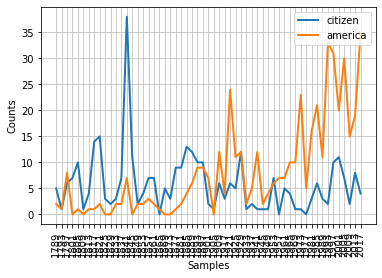

In [50]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target)
)

cfd.plot()

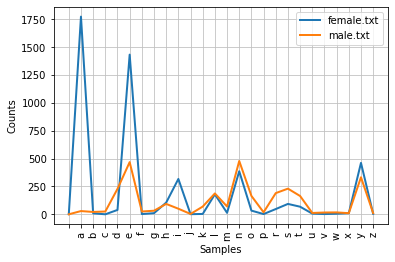

In [51]:
names = nltk.corpus.names

cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid)
)

cfd.plot()

In [9]:
print(wn.synsets('cute'))
print([l.lemma_names() for l in wn.synsets('cute')])

[Synset('cunning.s.01'), Synset('cute.s.02')]
[['cunning', 'cute'], ['cute', 'precious']]


In [11]:
print([l.definition() for l in wn.synsets('cute')])

['attractive especially by means of smallness or prettiness or quaintness', 'obviously contrived to charm']


In [12]:
print([l.examples() for l in wn.synsets('cute')])

[['a cute kid with pigtails', 'a cute little apartment', 'cunning kittens', 'a cunning baby'], ['an insufferably precious performance', 'a child with intolerably cute mannerisms']]


In [15]:
# doesn't work in the notebook but works in a python console
# nltk.app.wordnet()

In [26]:
chess_king = [l for l in wn.synsets('king') if "chess" in l.definition()][0]

chess_king

Synset('king.n.10')

In [74]:
print("name: ", chess_king.name())
print("lemma_names: ", chess_king.lemma_names())
print("definition: ", chess_king.definition())
print("examples: ", chess_king.examples())
print("hyponyms: ", chess_king.hyponyms())
print()
print("hyponyms: ", chess_king.hypernym_distances())
print()
print("attributes: ", chess_king.attributes())
print("also_sees: ", chess_king.also_sees())
print("causes: ", chess_king.causes())
print("topic_domains: ", chess_king.topic_domains())
print("usage_domains: ", chess_king.usage_domains())
print("verb_groups: ", chess_king.verb_groups())
print("offset: ", chess_king.offset())
print("root_hypernyms: ", chess_king.root_hypernyms())
print("lexname: ", chess_king.lexname())
print("pos: ", chess_king.pos())
print("frame_ids: ", chess_king.frame_ids())
print("also_sees: ", chess_king.also_sees())
print()
print("part_meronyms: ", chess_king.part_meronyms())
print("substance_meronyms: ", chess_king.substance_meronyms())
print("member_meronyms: ", chess_king.member_meronyms())
print("part_holonyms: ", chess_king.part_holonyms())
print("substance_holonyms: ", chess_king.substance_holonyms())
print("member_holonyms: ", chess_king.member_holonyms())

name:  king.n.10
lemma_names:  ['king']
definition:  (chess) the weakest but the most important piece
examples:  []
hyponyms:  []

hyponyms:  {(Synset('entity.n.01'), 10), (Synset('king.n.10'), 0), (Synset('object.n.01'), 8), (Synset('equipment.n.01'), 4), (Synset('instrumentality.n.03'), 5), (Synset('game_equipment.n.01'), 3), (Synset('chessman.n.01'), 1), (Synset('physical_entity.n.01'), 9), (Synset('whole.n.02'), 7), (Synset('artifact.n.01'), 6), (Synset('man.n.10'), 2)}

attributes:  []
also_sees:  []
causes:  []
topic_domains:  [Synset('chess.n.02')]
usage_domains:  []
verb_groups:  []
offset:  3618101
root_hypernyms:  [Synset('entity.n.01')]
lexname:  noun.artifact
pos:  n
frame_ids:  []
also_sees:  []

part_meronyms:  []
substance_meronyms:  []
member_meronyms:  []
part_holonyms:  []
substance_holonyms:  []
member_holonyms:  []


In [75]:
car = wn.synsets("car")[0]

print("name: ", car.name())
print("lemma_names: ", car.lemma_names())
print("definition: ", car.definition())
print("examples: ", car.examples())
print()
print("hyponyms: ", car.hyponyms())
print()
print("hyponyms: ", car.hypernym_distances())
print()
print("attributes: ", car.attributes())
print("also_sees: ", car.also_sees())
print("causes: ", car.causes())
print("topic_domains: ", car.topic_domains())
print("usage_domains: ", car.usage_domains())
print("verb_groups: ", car.verb_groups())
print("offset: ", car.offset())
print("root_hypernyms: ", car.root_hypernyms())
print("lexname: ", car.lexname())
print("pos: ", car.pos())
print("frame_ids: ", car.frame_ids())
print("also_sees: ", car.also_sees())
print()
print("part_meronyms: ", chess_king.part_meronyms())
print("substance_meronyms: ", chess_king.substance_meronyms())
print("member_meronyms: ", chess_king.member_meronyms())
print("part_holonyms: ", chess_king.part_holonyms())
print("substance_holonyms: ", chess_king.substance_holonyms())
print("member_holonyms: ", chess_king.member_holonyms())

name:  car.n.01
lemma_names:  ['car', 'auto', 'automobile', 'machine', 'motorcar']
definition:  a motor vehicle with four wheels; usually propelled by an internal combustion engine
examples:  ['he needs a car to get to work']

hyponyms:  [Synset('ambulance.n.01'), Synset('beach_wagon.n.01'), Synset('bus.n.04'), Synset('cab.n.03'), Synset('compact.n.03'), Synset('convertible.n.01'), Synset('coupe.n.01'), Synset('cruiser.n.01'), Synset('electric.n.01'), Synset('gas_guzzler.n.01'), Synset('hardtop.n.01'), Synset('hatchback.n.01'), Synset('horseless_carriage.n.01'), Synset('hot_rod.n.01'), Synset('jeep.n.01'), Synset('limousine.n.01'), Synset('loaner.n.02'), Synset('minicar.n.01'), Synset('minivan.n.01'), Synset('model_t.n.01'), Synset('pace_car.n.01'), Synset('racer.n.02'), Synset('roadster.n.01'), Synset('sedan.n.01'), Synset('sport_utility.n.01'), Synset('sports_car.n.01'), Synset('stanley_steamer.n.01'), Synset('stock_car.n.01'), Synset('subcompact.n.01'), Synset('touring_car.n.01'), S

In [71]:
wn.synsets("entity")[0].definition()

'that which is perceived or known or inferred to have its own distinct existence (living or nonliving)'

## Exercises

1. Create a variable phrase containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.

2. Use the corpus module to explore austen-persuasion.txt. How many word tokens does this book have? How many word types?

3. Use the Brown corpus reader `nltk.corpus.brown.words()` or the Web text corpus reader `nltk.corpus.webtext.words()` to access some sample text in two different genres.

In [77]:
# 1.
words_list = ["hello", "my", "name", "is", "Grégoire"]

print(words_list + ["!"])
print(words_list + ["!"] * 2)
print(words_list[3])
print(words_list[2:])
print(sorted(words_list))

['hello', 'my', 'name', 'is', 'Grégoire', '!']
['hello', 'my', 'name', 'is', 'Grégoire', '!', '!']
is
['name', 'is', 'Grégoire']
['Grégoire', 'hello', 'is', 'my', 'name']


In [84]:
# 2.
num_words = sum(len(sent) for sent in sentences)
num_word_types = len(set(
    word for sent in sentences
    for word in sent
))

num_words, num_word_types

(192484, 7806)

In [ ]:
# 3.


4. Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

5. Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: member_meronyms(), part_meronyms(), substance_meronyms(), member_holonyms(), part_holonyms(), and substance_holonyms().

6. In the discussion of comparative wordlists, we created an object called translate which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?